In [1]:
import cirq
import numpy as np
from cirq_superstaq import Service, AceCRPlusMinus, AceCR

In [2]:
try:
    import qiskit

    install_qiskit = not ("0.18" <= qiskit.__version__ < "0.19")
except ImportError:
    install_qiskit = True

if install_qiskit:
    print("installing qiskit...")
    !pip install -q qiskit-terra==0.18.3
    print("installed qiskit.")

In [3]:
service = Service(
    remote_host="https://127.0.0.1:5000",
    api_key="ya29.A0ARrdaM_dlFfp9eU1462_c6mmte9d0oy_dTfX3P2mnZUfl9HDvP0u0__9Et5Wf1J8iqOfRoLUlOfYtPDIW8lsuPvy9Ot9wq-5jNI7hEhBJiQBnJOzjt-FW31Xd_DrQuFSMNjiByEEwm56sllisfgT0hOsibD-1ig",
)

In [4]:
qubits = cirq.LineQubit.range(2)

In [5]:
circuit = cirq.Circuit(AceCRPlusMinus(qubits[0], qubits[1]))

In [6]:
circuit

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───

In [7]:
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")

/home/vtomole/cirq_superstaq_venv/lib/python3.8/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [8]:
out.circuit

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───

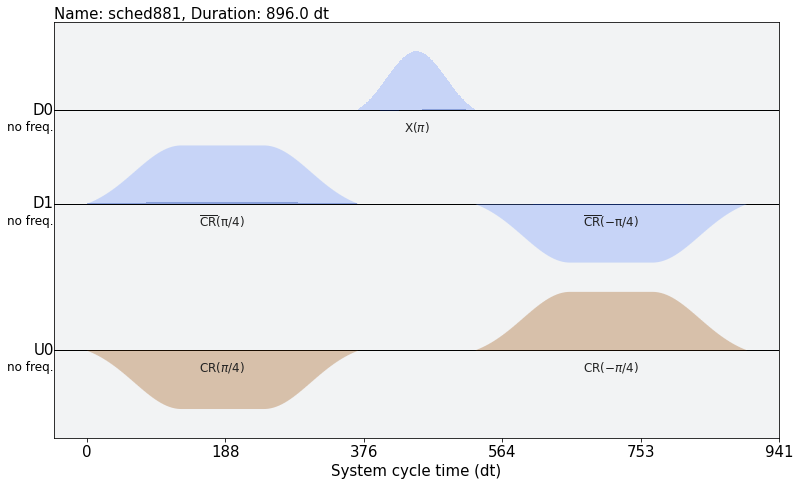

In [9]:
out.pulse.draw()

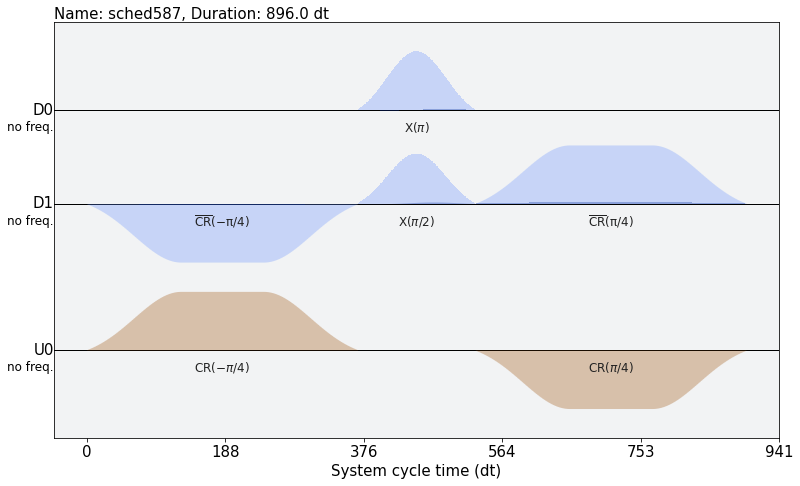

In [9]:
circuit = cirq.Circuit(AceCR("-+", np.pi / 2)(qubits[0], qubits[1]))
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")
out.draw()